# SECOND EXPERIMENTATION- THIRD ASSUMPTION, K-NEAREST NEIGHBORHOODS ALGORITHM

## Training a sentiment analysis classifier based on supervised machine learning algorithms

In [1]:
import string

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
stop_words = set(stopwords.words('spanish'))

In [4]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

### Loading labeled tweets

In [5]:
# Dataset loaded from: https://docs.google.com/spreadsheets/d/11_E2ngsEOyTQwbwVVRHY5urzFF95BQCV/edit#gid=1788161364
tweets_df = pd.read_csv('./data/tweets-etiquetadostotales.csv', sep = ',')

In [6]:
tweets_df.shape

(258, 2)

In [7]:
tweets_df.head()

,full_text,sentiment
0,"Cómo es posible afirmar que hay democracia en Colombia cuando estamos realizando elecciones a la presidencia en medio de la guerra contra la población? Como diría la filósofa Hannah Arendt, allí donde comienza la violencia, termina la política\n #ParenLaGuerra",negative
1,"Lo peor que le puede pasar a Colombia son las elecciones. Sacan lo mas feo de muchas personas, la intolerancia, el individualismo, la manipulación, etc.\n \n Voy a tener que limpiar mi twitter porque ya me cansé. \n \n No hay cuerpo que lo resista!",negative
2,"Gracias a los Acuerdos de paz de La Habana en 2018 Colombia tuvo las elecciones más pacíficas de su historia. \n \n Uribismo nos devolvió a elecciones en medio de guerra, paros armados y violaciones masivas a los ddhh.",neutral
3,"@Danielacad3 Consejo de un Venezolano que ama a Colombia. No bajen la guardia, el que cuenta los votos @Registraduria es FICHA DEL FORO DE SAO PAULO. Todavía hay vicios de las elecciones pasadas para favorecer al Pacto Histórico y ni pío a dicho el tipo. Pilas pues",negative
4,@supershadai @Registraduria Quien o que institución en Colombia atiende los reclamos al fraude electoral?\n Porque no suspender a al registrador que ya la defeco en las elecciones de senado y camara.\n Hay una desconfianza general en cuanto a las presidenciales.\n Están provocando una respuesta violenta.,neutral


In [8]:
tweets_df['sentiment'].value_counts(dropna = False, normalize = True)

negative    0.542636
neutral     0.375969
positive    0.081395
Name: sentiment, dtype: float64

### Leaving out unlabeled texts, this data is not useful for training or validating a supervised model

In [9]:
# Removing  unlabeled tweets
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]

In [10]:
tweets_labeled_df.shape

(258, 2)

In [11]:
tweets_unlabeled_df = tweets_df.loc[tweets_df['sentiment'].isnull()]

In [12]:
tweets_unlabeled_df.shape

(0, 2)

In [13]:
# Scenario 1: Working with all classes
tweets_labeled_df['sentiment'] = tweets_labeled_df['sentiment']

### Splitting train and test datasets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.2, stratify = tweets_labeled_df['sentiment'], random_state = 1)


In [15]:
X_train.shape

(206,)

In [16]:
pd.Series(y_train).value_counts(normalize = True)

negative    0.543689
neutral     0.373786
positive    0.082524
Name: sentiment, dtype: float64

In [17]:
X_test.shape

(52,)

In [18]:
pd.Series(y_test).value_counts(normalize = True)

negative    0.538462
neutral     0.384615
positive    0.076923
Name: sentiment, dtype: float64

### Vectorizing texts

<table>
    <tbody>
        <tr>
            <td>
                <h4>Bag of Words</h4>
                <img src="imgs/bow.png" style="width: 500px;">
            </td>
            <td>
                <h4>TF-IDF</h4>
                <img src="imgs/tf-idf.png" style="width: 500px;">
            </td>
        </tr>
    </tbody>
</table>

In [19]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [20]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [21]:
X_bow = bow.fit_transform(X_train)

In [22]:
X_tfidf = tfidf.fit_transform(X_train)

### Training and evaluating a model using BOW

In [23]:
model =  KNeighborsClassifier(n_neighbors=5,weights='distance')

In [24]:
model.fit(X_bow, y_train)

KNeighborsClassifier(weights='distance')

In [25]:
y_train_bow_predict = model.predict(X_bow)
y_test_bow_predict = model.predict(bow.transform(X_test))

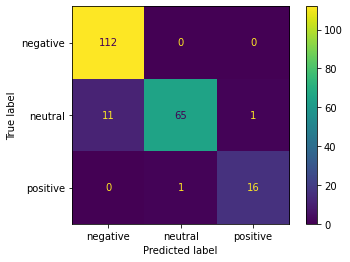

In [26]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

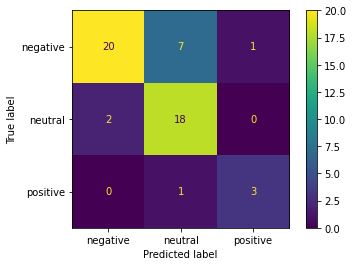

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [28]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_test, y_test_bow_predict, average = None))
print('Recall:', recall_score(y_test, y_test_bow_predict, average = None))
print('F1:', f1_score(y_test, y_test_bow_predict, average = None))

Precision: [0.90909091 0.69230769 0.75      ]
Recall: [0.71428571 0.9        0.75      ]
F1: [0.8       0.7826087 0.75     ]


### Training and evaluating a model using TF-IDF

In [29]:
model =  KNeighborsClassifier(n_neighbors=5,weights='distance')

In [30]:
model.fit(X_tfidf, y_train)

KNeighborsClassifier(weights='distance')

In [31]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(bow.transform(X_test))

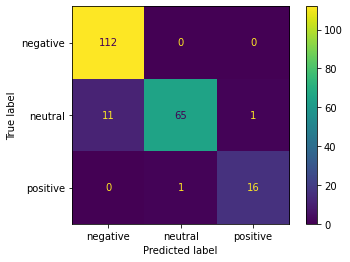

In [32]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

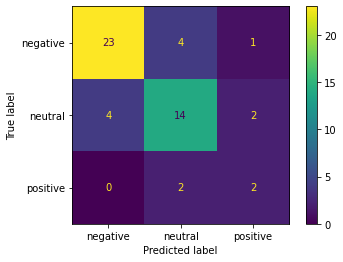

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [34]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_test, y_test_tfidf_predict, average = None))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, average = None))
print('F1:', f1_score(y_test, y_test_tfidf_predict, average = None))

Precision: [0.85185185 0.7        0.4       ]
Recall: [0.82142857 0.7        0.5       ]
F1: [0.83636364 0.7        0.44444444]


### How interpret the results?

### Analyzing errors bag of words

In [35]:
error_df = pd.concat(
    [ pd.concat([X_test, y_test ], axis = 1).reset_index(),
    pd.Series(y_test_bow_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

error_df.drop('index', inplace = True, axis = 1)

In [36]:
error_df.shape

(52, 3)

In [37]:
error_df.loc[error_df['actual'] != error_df['predicted']].head()

,full_text,actual,predicted
1,"@RenataSokolov A ustedes, la derecha, buscando alterar el orden público para suspender elecciones y perpetuar el régimen de terror que pretende amedrentarnos...pero Colombia dijo no más y con Petro ganaremos en primera vuelta.",negative,neutral
2,"@CARLOSFMEJIA @Asdrubal1518 @infopresidencia @FiscaliaCol @PGN_COL @CNE_COLOMBIA Deben suspender elecciones, no es correcto prestarse a un fraude",neutral,negative
14,El robo de las elecciones ya está consumado\n \n @petrogustavo #PactoDeLaPicota frentes judiciales @asonaloficial @Registraduria @CNE_COLOMBIA @fecode tienen todo listo \n \n https://t.co/mCQRwNyUGS,negative,positive
15,Procuraduría alerta que 2.925 jurados de votación están inhabilitados para elecciones Colombia via @ElColombiano https://t.co/lCdwAtuKoM,negative,neutral
30,"@RenataSokolov A ustedes, la derecha, buscando alterar el orden público para suspender elecciones y perpetuar el régimen de terror que pretende amedrentarnos...pero Colombia dijo no más y con Petro ganaremos en primera vuelta.",negative,neutral


### Analyzing errors TF-IDF

In [38]:
error_df = pd.concat(
    [ pd.concat([X_test, y_test ], axis = 1).reset_index(),
    pd.Series(y_test_tfidf_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

error_df.drop('index', inplace = True, axis = 1)

In [39]:
error_df.shape

(52, 3)

In [40]:
error_df.loc[error_df['actual'] != error_df['predicted']].head()

,full_text,actual,predicted
2,"@CARLOSFMEJIA @Asdrubal1518 @infopresidencia @FiscaliaCol @PGN_COL @CNE_COLOMBIA Deben suspender elecciones, no es correcto prestarse a un fraude",neutral,negative
10,"¿Y Si gana @petrogustavo? ¡Colombia 🇨🇴escucha!\n \n Otro clip de la emisión de #EncuentroLibertario🗽, con @CarlosAChacon, del @ICPColombia, y a @Juan__Angel__, del @libertariocol sobre las elecciones presidenciales colombianas.\n \n Vea el video completo aquí: https://t.co/FFZeuyo62H https://t.co/Lyvy7pOnnd",neutral,negative
12,"¿Y Si gana @petrogustavo? ¡Colombia 🇨🇴escucha!\n \n Otro clip de la emisión de #EncuentroLibertario🗽, con @CarlosAChacon, del @ICPColombia, y a @Juan__Angel__, del @libertariocol sobre las elecciones presidenciales colombianas.\n \n Vea el video completo aquí: https://t.co/FFZeuyo62H https://t.co/Lyvy7pOnnd",neutral,negative
15,Procuraduría alerta que 2.925 jurados de votación están inhabilitados para elecciones Colombia via @ElColombiano https://t.co/lCdwAtuKoM,negative,neutral
20,#COLOMBIA: Si vas a cubrir las elecciones necesitas un plan de comunicación. \n \n Alerta rápidamente a los demás si algo te ha sucedido y proporciona toda la información necesaria para poner en marcha una respuesta adecuada. @ACOSalliance \n \n Encuéntralo aquí: https://t.co/b7OZvGdeDc https://t.co/420CLbD7Ur,neutral,positive
